In [1]:
import glob
import re
import pandas as pd
import matplotlib.pyplot as plt

file_paths = glob.glob('xmrig.txt')
data = []

for file_path in file_paths:
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            match = re.search(r'(\d+시 \d+분 \d+초)\s+all.*?(\d+\.\d+)$', line)
            if match:
                time = match.group(1)
                idle_cpu_usage = float(match.group(2))
                data.append([time, 100 - idle_cpu_usage])

df = pd.DataFrame(data, columns=['Time', 'CPU Usage'])
csv_file_path = 'xmrig.csv'
df.to_csv(csv_file_path, index=False)


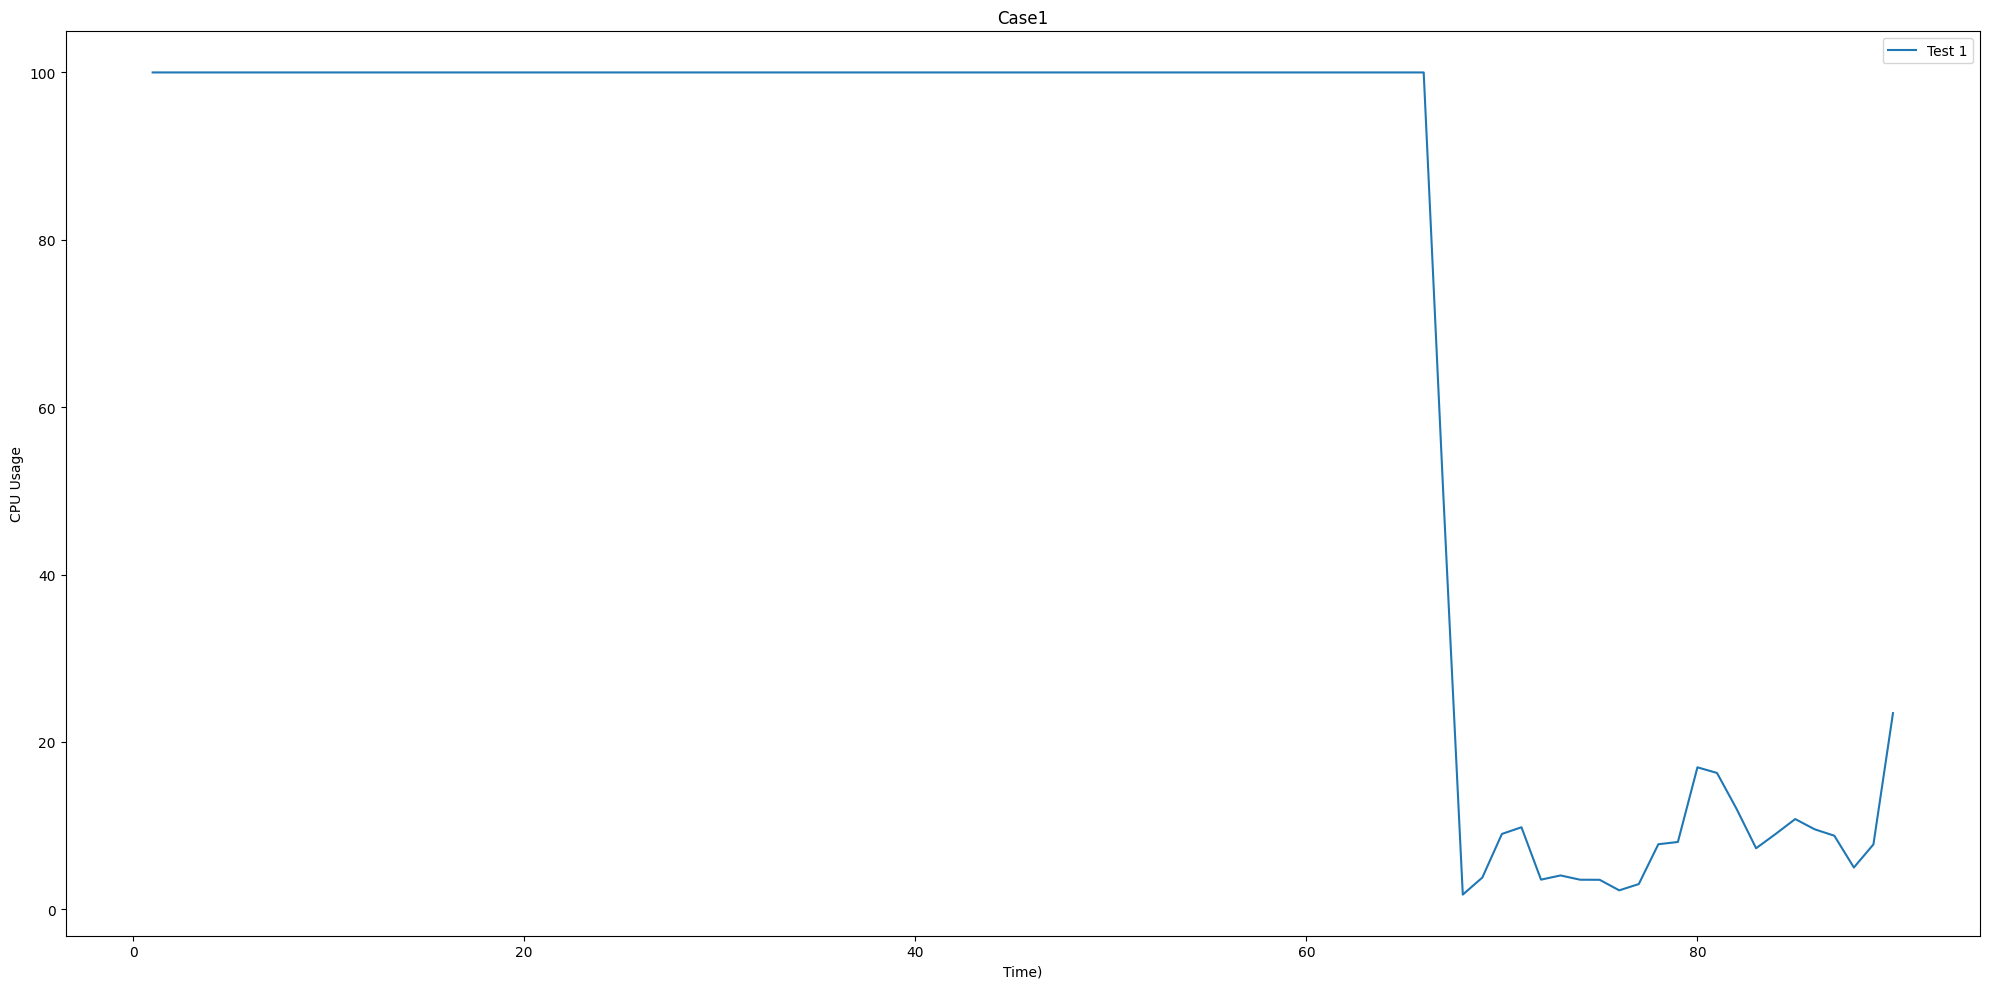

In [4]:
df = pd.read_csv('xmrig.csv')
test = [df[i:i + 90] for i in range(0, df.shape[0], 90)]

plt.figure(figsize=(20, 10))
for index, chunk in enumerate(test):
    plt.plot(range(1, len(chunk) + 1), chunk['CPU Usage'], label=f'Test {index + 1}')

plt.xlabel('Time)')
plt.ylabel('CPU Usage')
plt.title('xmrig')
plt.legend()
plt.tight_layout()
plt.show()
